In [84]:
"""
=========================================================
scikit-learn Pipeline and GridSearch with ESNRegressor 
=========================================================
This example shows a minimal example of Echo State Network
applied to a regression problem using a sklearn Pipeline 
and a GridSearch with cross-validation.
"""
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from echoes import ESNRegressor
from echoes.plotting import plot_predicted_ts

# Prepare synthetic data 
x = np.linspace(0, 30*np.pi, 1000).reshape(-1,1)
inputs = 100 * np.sin(x) + np.random.normal(scale=.2, size=x.shape)
outputs = np.cos(x) + np.random.normal(scale=.2, size=x.shape)
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=.3, shuffle=False)

pipe = Pipeline(
    [
        ("scaling", StandardScaler()),  # Try commenting out this line to see the effect
        ("esn", ESNRegressor(n_transient=100))
    ]
)

# Pass the parameter to sklearn pipeline with prefix esn__
param_grid={
    "esn__n_reservoir": [20, 50, 100, 150],
    "esn__leak_rate": [0.5, 0.8, 0.9, 0.95],
    "esn__spectral_radius": [0.85, 0.9, 0.95, 0.99],
}

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    n_jobs=5,
    cv=TimeSeriesSplit() # Use time series folds generator  
)
grid.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('esn', ESNRegressor(n_transient=100))]),
             n_jobs=5,
             param_grid={'esn__leak_rate': [0.5, 0.8, 0.9, 0.95],
                         'esn__n_reservoir': [20, 50, 100, 150],
                         'esn__spectral_radius': [0.85, 0.9, 0.95, 0.99]})

test r2 score:  0.916


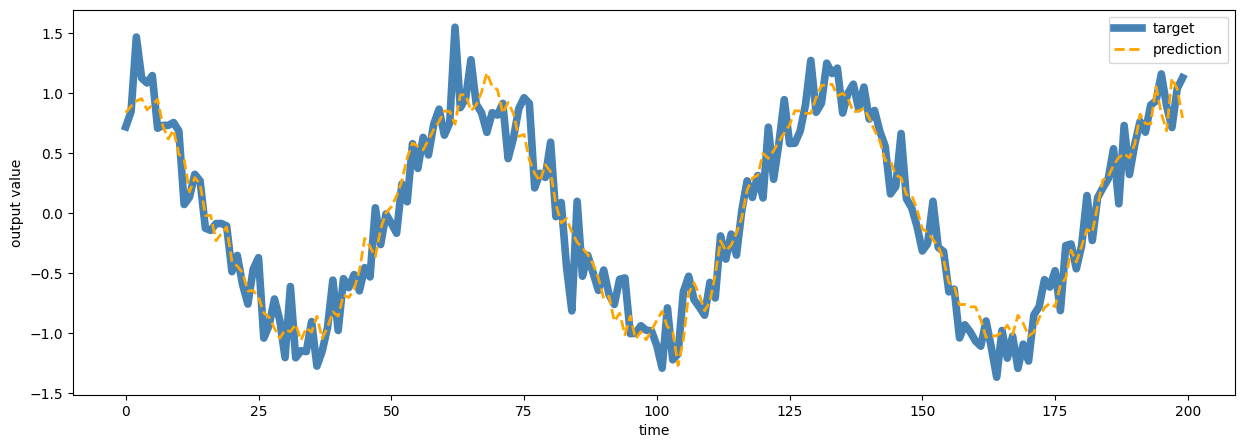

In [85]:
y_pred = grid.best_estimator_.predict(X_test)  # Get prediction for plotting
print("test r2 score: ", round(grid.score(X_test, y_test), 3))
plot_predicted_ts(y_test, y_pred, figsize=(15, 5), start=100);